In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
train_directory = '/content/drive/MyDrive/Crash_Footage_2/train'
validation_directory = '/content/drive/MyDrive/Crash_Footage_2/val'
test_directory = '/content/drive/MyDrive/Crash_Footage_2/test'

In [4]:
batch_size = 32
img_height = 256
img_width = 256

In [5]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=None,
    interpolation="bilinear"
)

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    validation_directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=None,
    interpolation="bilinear"
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=None,
    interpolation="bilinear"
)

Found 1505 files belonging to 2 classes.
Found 365 files belonging to 2 classes.
Found 1038 files belonging to 2 classes.


In [6]:
class_names = train_data.class_names
print(class_names)

['Accident', 'Non Accident']


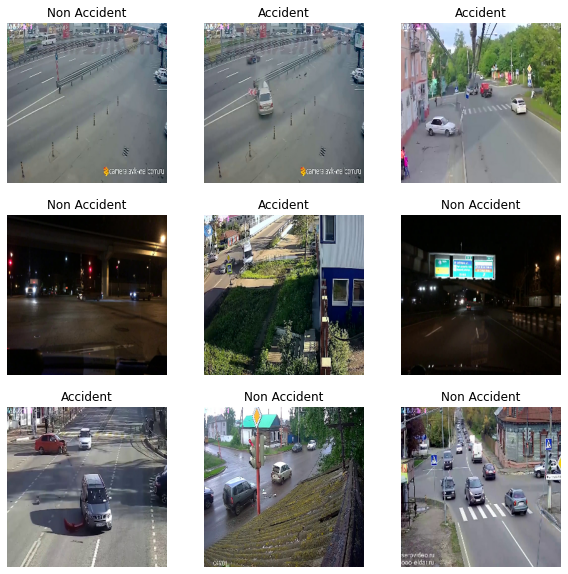

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [8]:
import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

from tensorflow.keras import layers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import BatchNormalization

In [9]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ])

In [10]:
class_names = train_data.class_names

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_data = train_data.cache().prefetch(buffer_size=AUTOTUNE)
test_data = test_data.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
model_1 = tf.keras.models.Sequential([
  data_augmentation,                                  
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  Dropout(0.25),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  Dropout(0.25),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  Dropout(0.25),
  layers.MaxPooling2D(),
  layers.Flatten(),
  Dropout(0.25),
  layers.Dense(256, activation='relu'),
  layers.Dense(len(class_names), activation= 'softmax')
])

model_1.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
result_1 = model_1.fit(train_data, validation_data= val_data, epochs = 25)

Epoch 1/25
48/48 [==============================] - 337s 7s/step - loss: 2.6240 - accuracy: 0.5973 - val_loss: 0.6633 - val_accuracy: 0.6082
Epoch 2/25
48/48 [==============================] - 290s 6s/step - loss: 0.5116 - accuracy: 0.7017 - val_loss: 0.6023 - val_accuracy: 0.6877
Epoch 3/25
48/48 [==============================] - 292s 6s/step - loss: 0.4555 - accuracy: 0.7608 - val_loss: 0.5822 - val_accuracy: 0.7123
Epoch 4/25
48/48 [==============================] - 290s 6s/step - loss: 0.4974 - accuracy: 0.7289 - val_loss: 0.5436 - val_accuracy: 0.7479
Epoch 5/25
48/48 [==============================] - 290s 6s/step - loss: 0.4016 - accuracy: 0.7953 - val_loss: 0.4878 - val_accuracy: 0.7699
Epoch 6/25
48/48 [==============================] - 290s 6s/step - loss: 0.3925 - accuracy: 0.8080 - val_loss: 0.5477 - val_accuracy: 0.7452
Epoch 7/25
48/48 [==============================] - 290s 6s/step - loss: 0.3793 - accuracy: 0.8073 - val_loss: 0.4963 - val_accuracy: 0.7671
Epoch 8/25
48

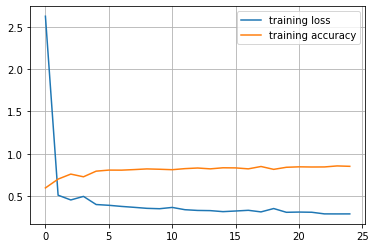

In [ ]:
plt.plot(result_1.history['loss'], label = 'training loss')
plt.plot(result_1.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()

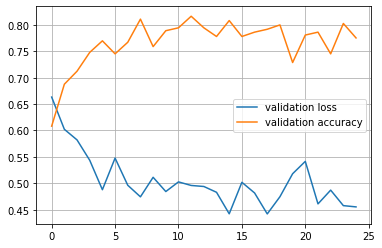

In [ ]:
plt.plot(result_1.history['val_loss'], label = 'validation loss')
plt.plot(result_1.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()

In [ ]:
test_loss, test_acc = model_1.evaluate(test_data, verbose=2)

33/33 - 154s - loss: 0.8767 - accuracy: 0.6570 - 154s/epoch - 5s/step


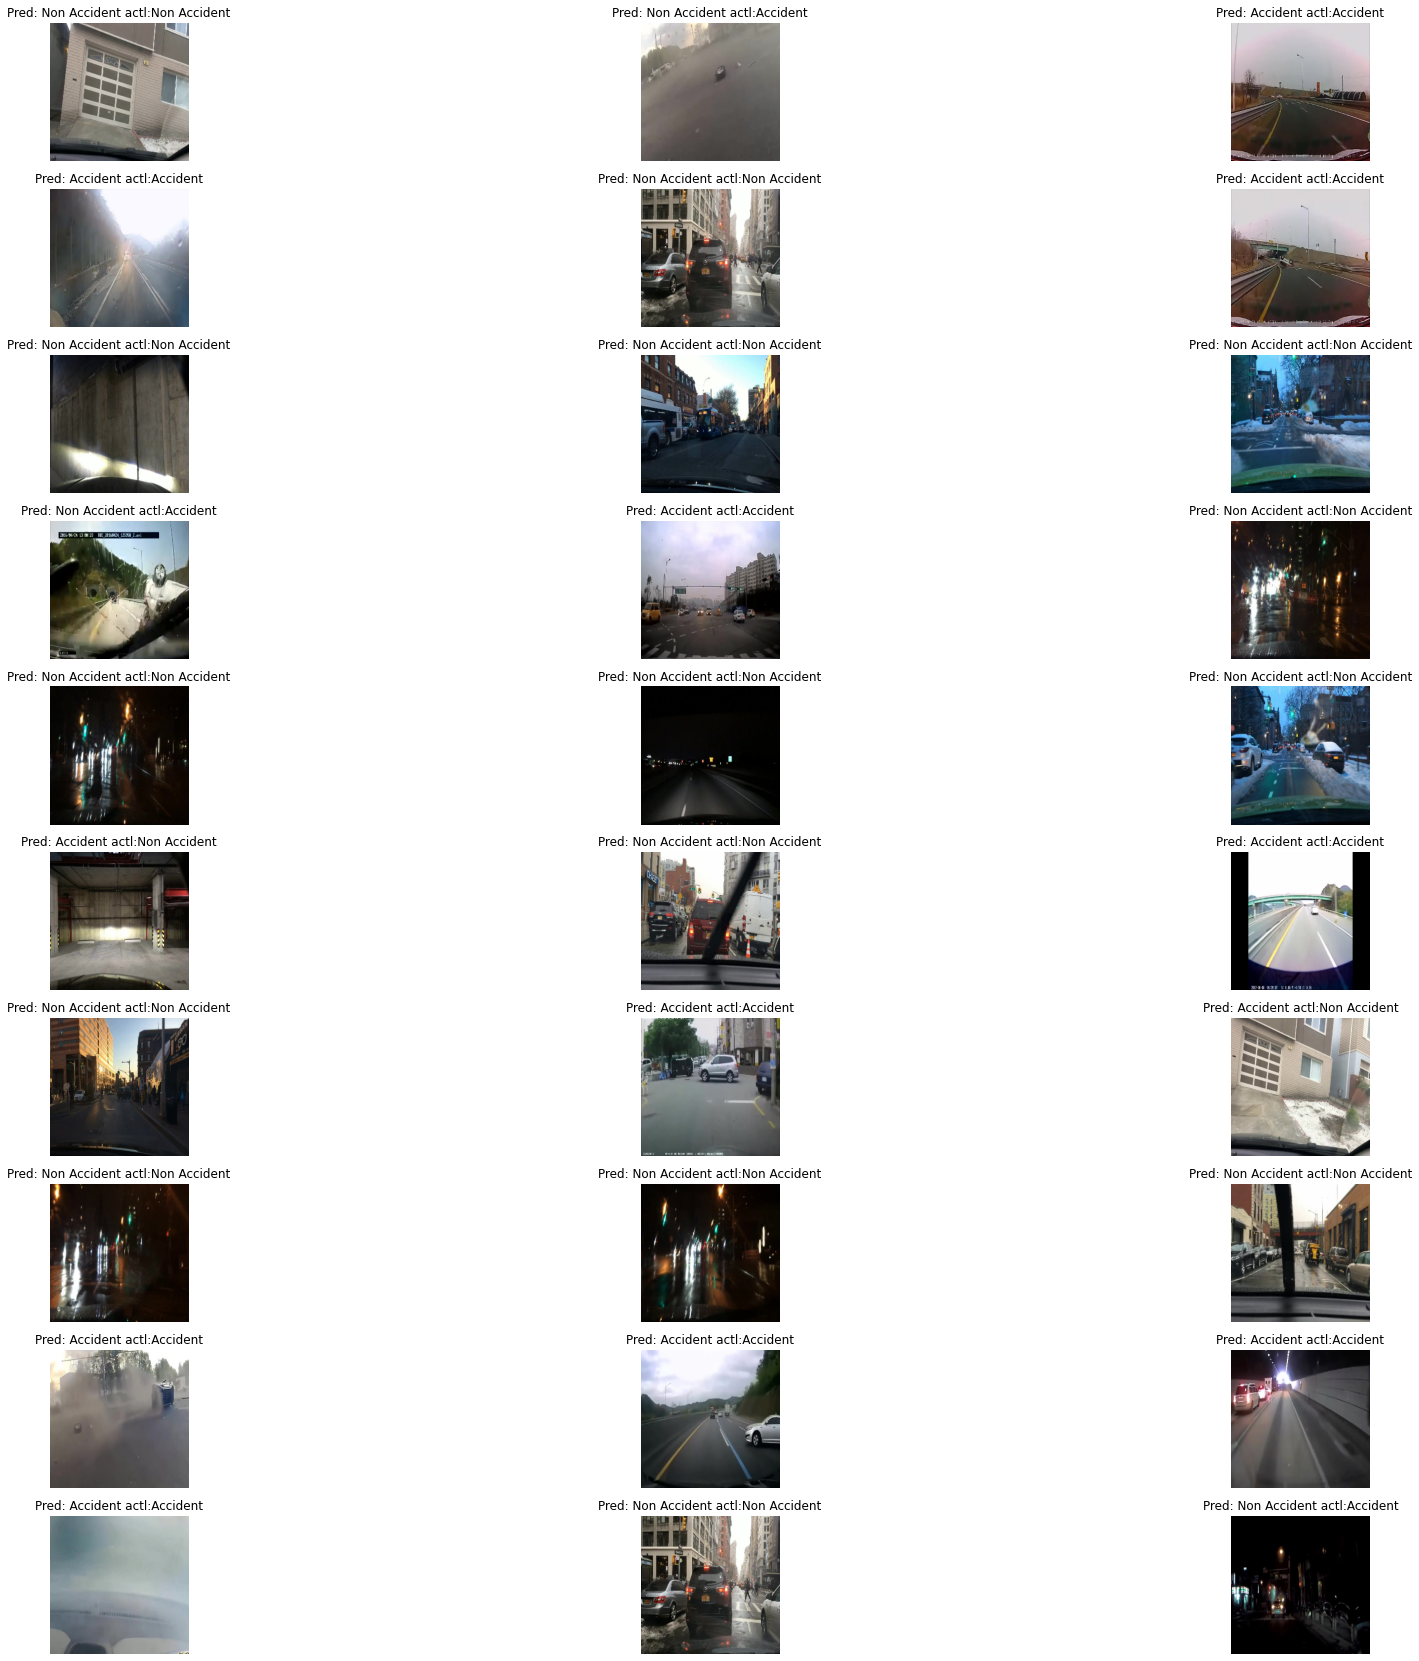

In [ ]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in test_data.take(1):
    predictions = model_1.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(30):
        ax = plt.subplot(10, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)

In [13]:
resnet = ResNet50(weights='imagenet', include_top=False)

for layer in resnet.layers:
    layer.trainable = False

94781440/94765736 [==============================] - 1s 0us/step


In [14]:
x = resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
model_2 = Model(resnet.input, predictions)

model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
result_2 = model_2.fit(train_data, epochs=25, validation_data=val_data)

Epoch 1/25
48/48 [==============================] - 385s 8s/step - loss: 0.5480 - accuracy: 0.7874 - val_loss: 0.5161 - val_accuracy: 0.7288
Epoch 2/25
48/48 [==============================] - 380s 8s/step - loss: 0.2818 - accuracy: 0.8664 - val_loss: 0.2419 - val_accuracy: 0.8932
Epoch 3/25
48/48 [==============================] - 383s 8s/step - loss: 0.2241 - accuracy: 0.8977 - val_loss: 0.2210 - val_accuracy: 0.9205
Epoch 4/25
48/48 [==============================] - 382s 8s/step - loss: 0.1933 - accuracy: 0.9110 - val_loss: 0.1810 - val_accuracy: 0.9397
Epoch 5/25
48/48 [==============================] - 380s 8s/step - loss: 0.1657 - accuracy: 0.9282 - val_loss: 0.1546 - val_accuracy: 0.9452
Epoch 6/25
48/48 [==============================] - 381s 8s/step - loss: 0.1358 - accuracy: 0.9495 - val_loss: 0.1341 - val_accuracy: 0.9616
Epoch 7/25
48/48 [==============================] - 381s 8s/step - loss: 0.1048 - accuracy: 0.9628 - val_loss: 0.1314 - val_accuracy: 0.9425
Epoch 8/25
48

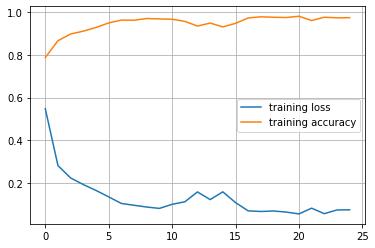

In [ ]:
plt.plot(result_2.history['loss'], label = 'training loss')
plt.plot(result_2.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()

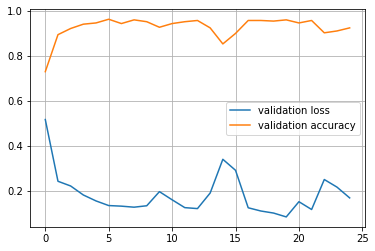

In [ ]:
plt.plot(result_2.history['val_loss'], label = 'validation loss')
plt.plot(result_2.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()

In [ ]:
test_loss, test_acc = model_2.evaluate(test_data, verbose=2)

33/33 - 211s - loss: 1.0543 - accuracy: 0.7399 - 211s/epoch - 6s/step


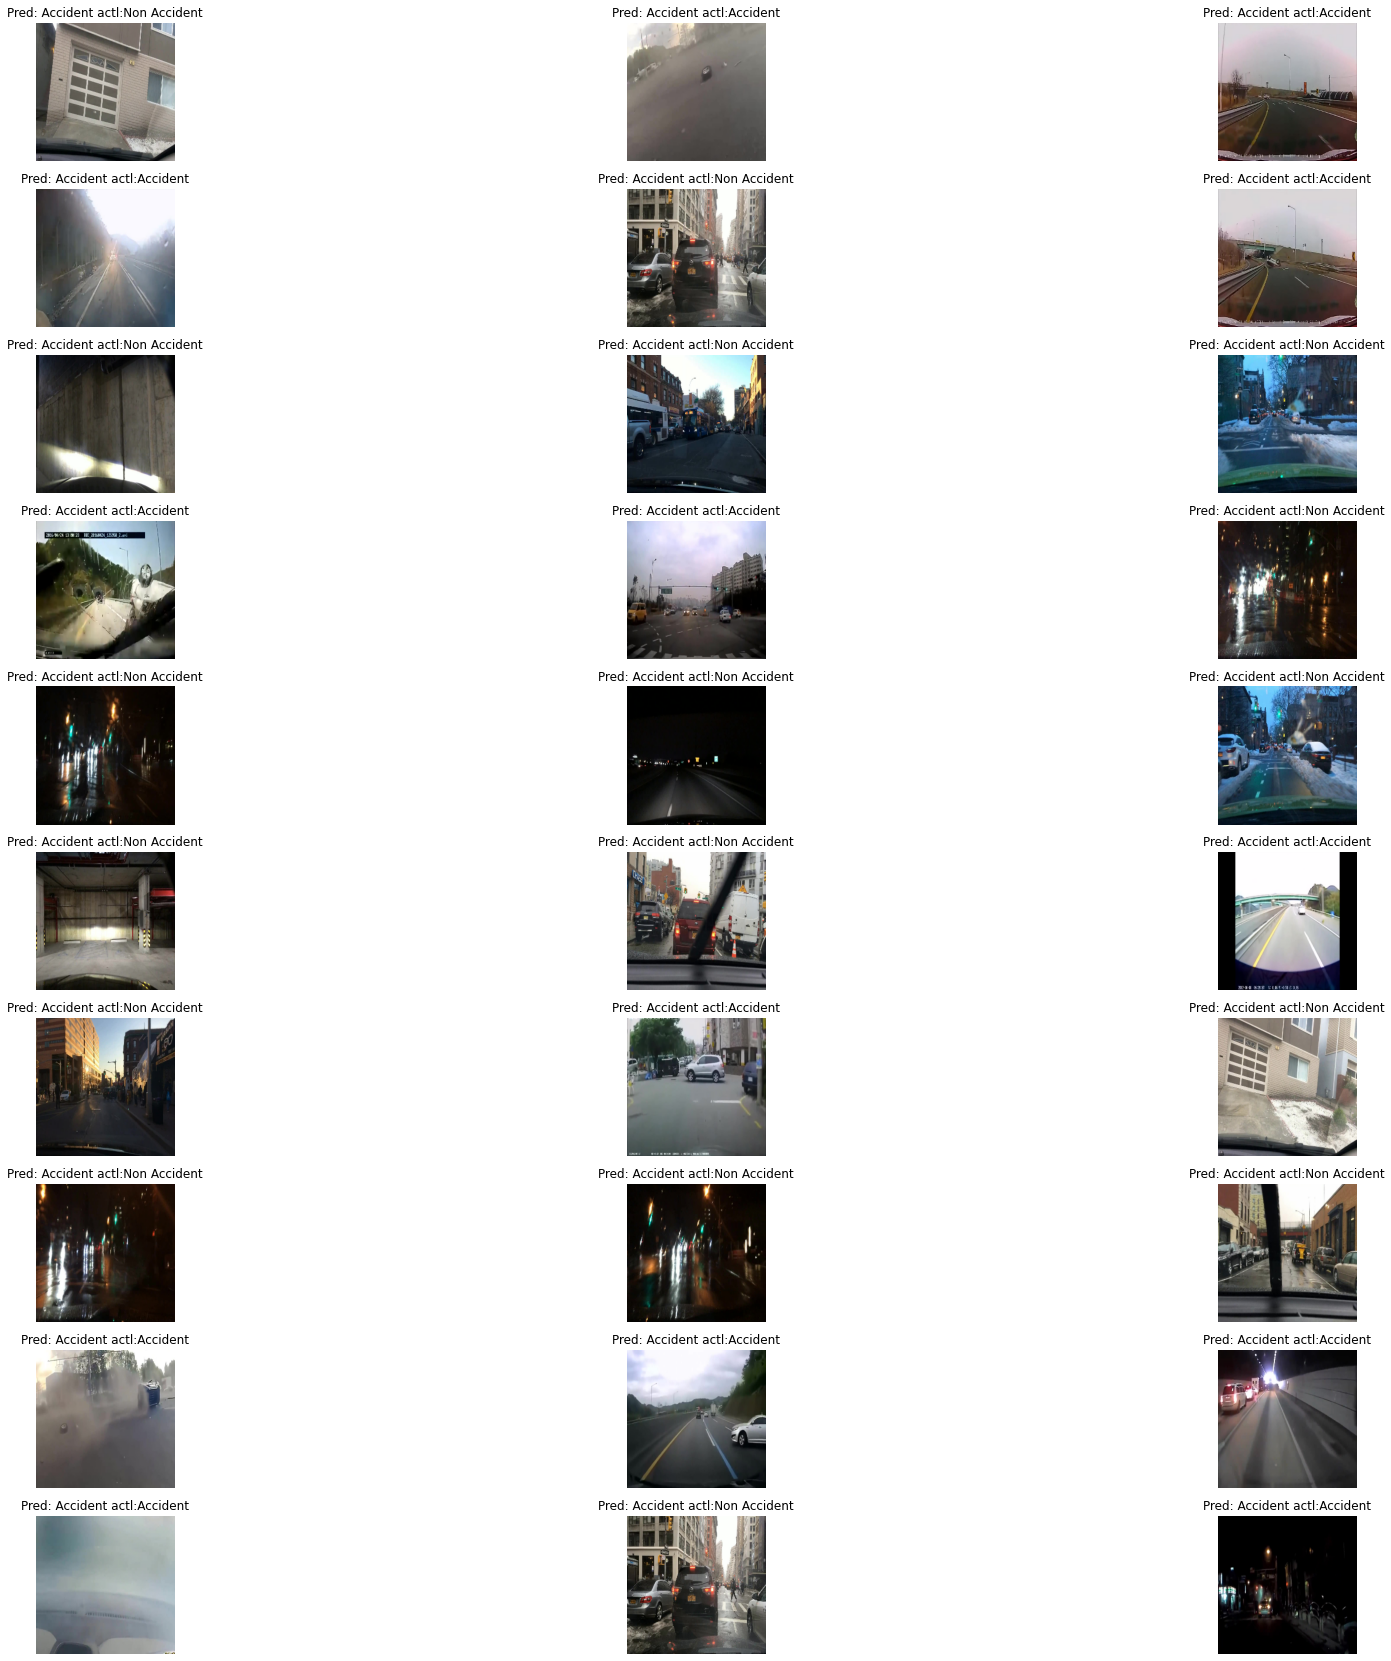

In [ ]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in test_data.take(1):
    predictions = model_2.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(30):
        ax = plt.subplot(10, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)

In [15]:
from tensorflow.keras.applications import MobileNetV2

In [16]:
MobileNetV2 = MobileNetV2(weights='imagenet', include_top=False)

x = MobileNetV2.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
model_3 = Model(MobileNetV2.input, predictions)

model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
result_3 = model_3.fit(train_data, epochs=25, validation_data=val_data)

Epoch 1/25
48/48 [==============================] - 407s 8s/step - loss: 0.4203 - accuracy: 0.8166 - val_loss: 7.9775 - val_accuracy: 0.5151
Epoch 2/25
48/48 [==============================] - 384s 8s/step - loss: 0.2210 - accuracy: 0.8983 - val_loss: 18.3192 - val_accuracy: 0.5151
Epoch 3/25
48/48 [==============================] - 381s 8s/step - loss: 0.2007 - accuracy: 0.9349 - val_loss: 6.5025 - val_accuracy: 0.5534
Epoch 4/25
48/48 [==============================] - 384s 8s/step - loss: 0.1351 - accuracy: 0.9488 - val_loss: 5.9833 - val_accuracy: 0.5178
Epoch 5/25
48/48 [==============================] - 380s 8s/step - loss: 0.1275 - accuracy: 0.9535 - val_loss: 8.1515 - val_accuracy: 0.6603
Epoch 6/25
48/48 [==============================] - 380s 8s/step - loss: 0.0903 - accuracy: 0.9714 - val_loss: 20.7947 - val_accuracy: 0.5151
Epoch 7/25
48/48 [==============================] - 379s 8s/step - loss: 0.1041 - accuracy: 0.9668 - val_loss: 8.0367 - val_accuracy: 0.5123
Epoch 8/25


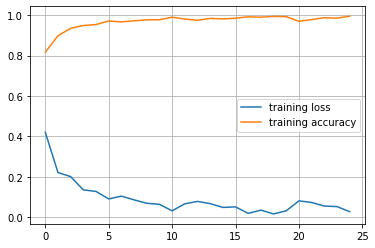

In [ ]:
plt.plot(result_3.history['loss'], label = 'training loss')
plt.plot(result_3.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()

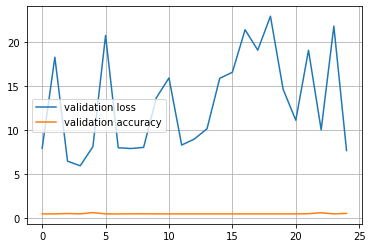

In [ ]:
plt.plot(result_3.history['val_loss'], label = 'validation loss')
plt.plot(result_3.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()

In [ ]:
test_loss, test_acc = model_3.evaluate(test_data, verbose=2)

33/33 - 38s - loss: 6.1180 - accuracy: 0.6224 - 38s/epoch - 1s/step


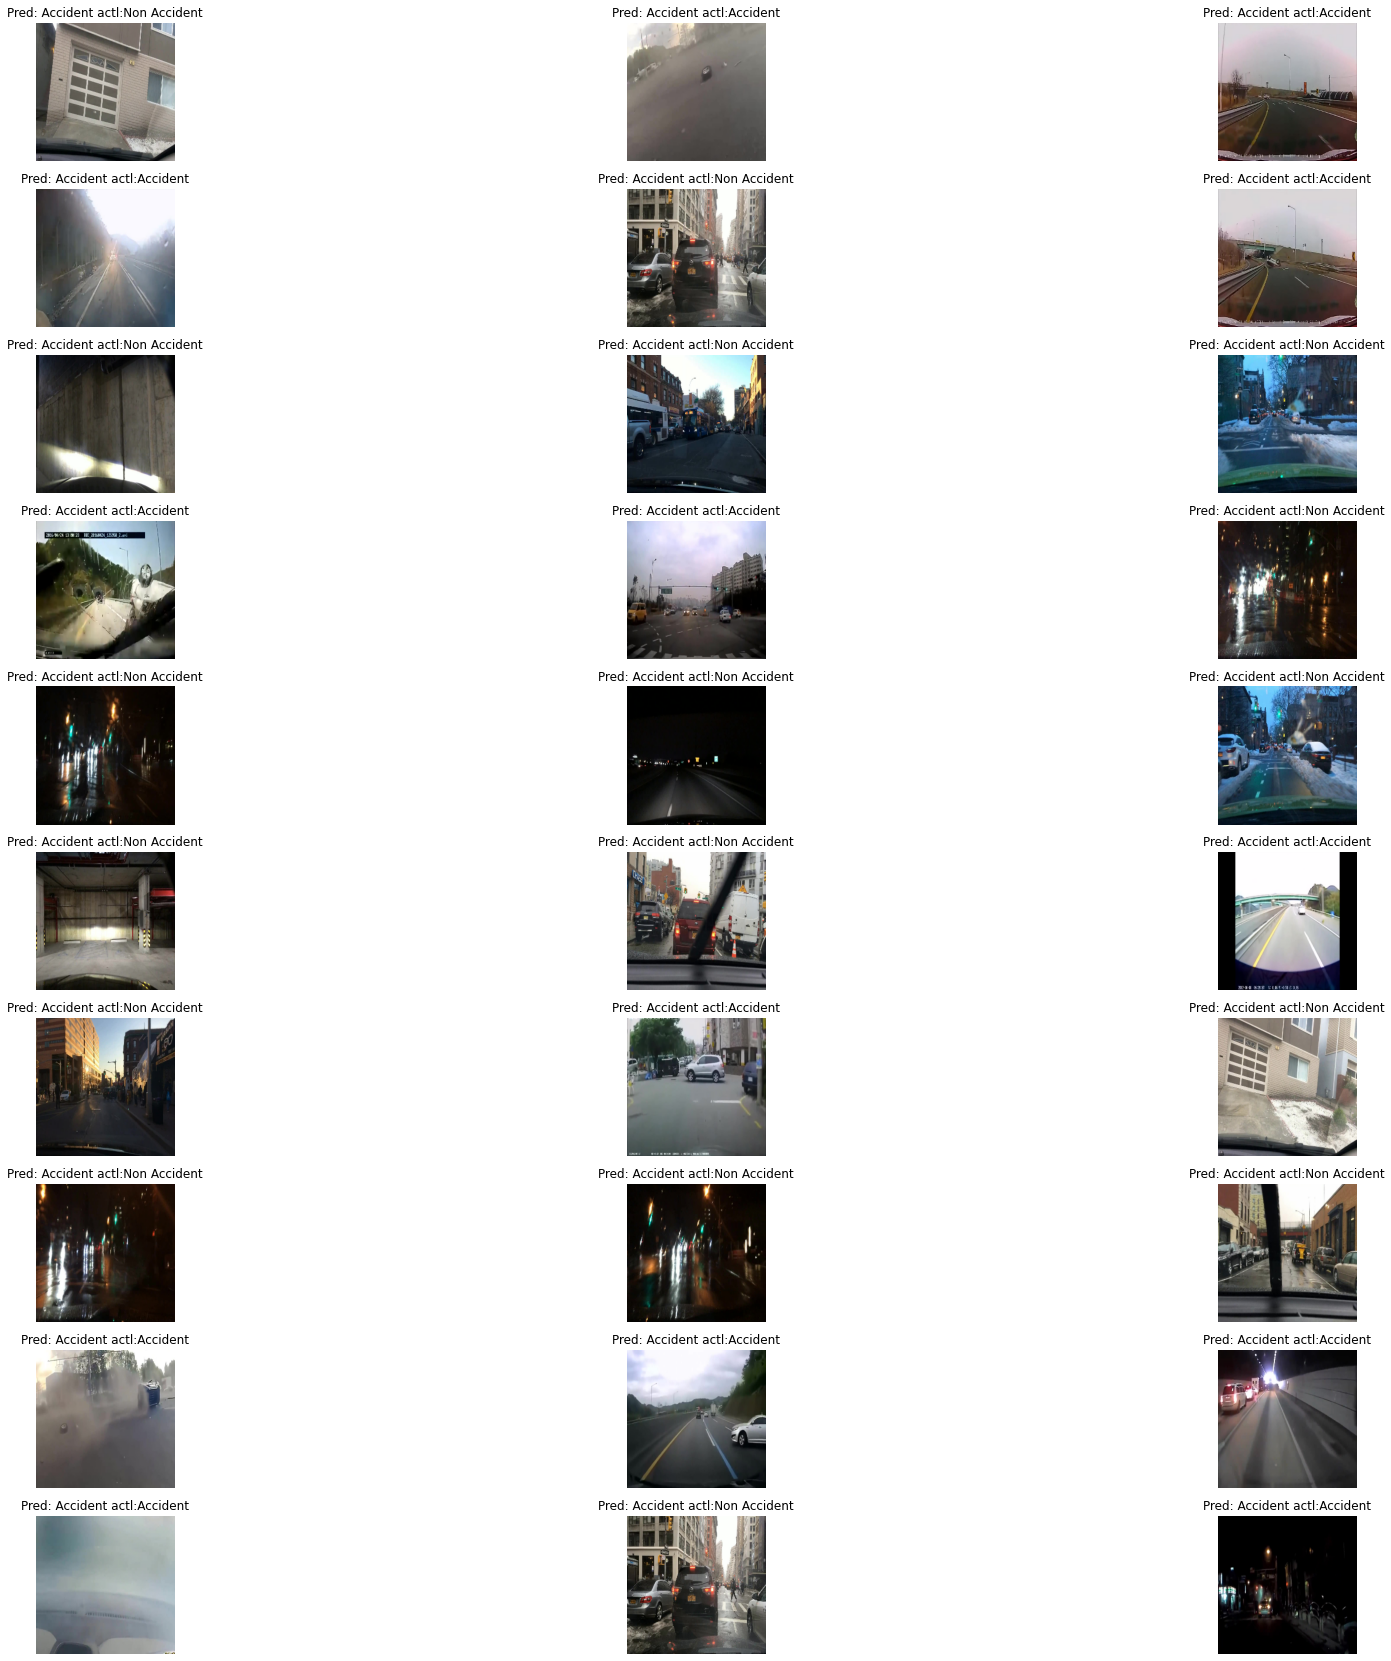

In [ ]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in test_data.take(1):
    predictions = model_3.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(30):
        ax = plt.subplot(10, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)

In [11]:
from tensorflow.keras.applications import InceptionV3

In [12]:
InceptionV3 = InceptionV3(weights='imagenet', include_top=False)

x = InceptionV3.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
model_4 = Model(InceptionV3.input, predictions)

model_4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

87924736/87910968 [==============================] - 0s 0us/step


In [ ]:
result_4 = model_4.fit(train_data, epochs=25, validation_data=val_data)

Epoch 1/25
48/48 [==============================] - 1042s 22s/step - loss: 0.6623 - accuracy: 0.7010 - val_loss: 452.5502 - val_accuracy: 0.4849
Epoch 2/25
48/48 [==============================] - 994s 21s/step - loss: 0.3938 - accuracy: 0.8259 - val_loss: 3.0911 - val_accuracy: 0.5534
Epoch 3/25
48/48 [==============================] - 1003s 21s/step - loss: 0.2699 - accuracy: 0.8850 - val_loss: 1.7111 - val_accuracy: 0.5205
Epoch 4/25
48/48 [==============================] - 1006s 21s/step - loss: 0.2339 - accuracy: 0.9130 - val_loss: 2.2198 - val_accuracy: 0.4575
Epoch 5/25
48/48 [==============================] - 993s 21s/step - loss: 0.2220 - accuracy: 0.9076 - val_loss: 2.2390 - val_accuracy: 0.5890
Epoch 6/25
48/48 [==============================] - 987s 21s/step - loss: 0.1992 - accuracy: 0.9243 - val_loss: 1.3982 - val_accuracy: 0.7178
Epoch 7/25
48/48 [==============================] - 996s 21s/step - loss: 0.1567 - accuracy: 0.9449 - val_loss: 1.0345 - val_accuracy: 0.7178
E

In [17]:
plt.plot(result_4.history['loss'], label = 'training loss')
plt.plot(result_4.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()

NameError: ignored

In [ ]:
plt.plot(result_4.history['val_loss'], label = 'validation loss')
plt.plot(result_4.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()

In [ ]:
test_loss, test_acc = model_4.evaluate(test_data, verbose=2)

In [ ]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in test_data.take(1):
    predictions = model_3.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(30):
        ax = plt.subplot(10, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)

In [20]:
model_1.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
model_1.summary()

ValueError: ignored

In [23]:
model_1.build((None, 256, 256, 3))

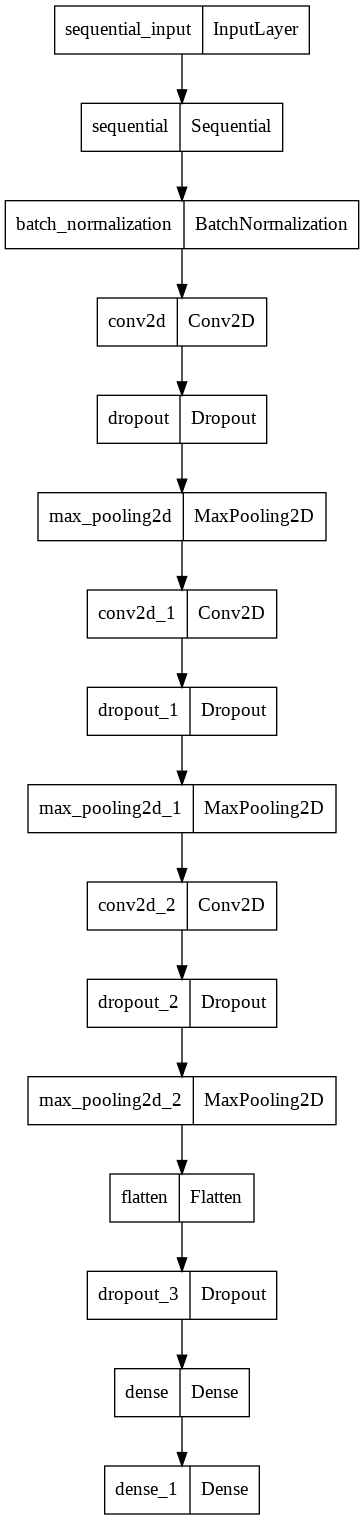

In [24]:
tf.keras.utils.plot_model(
    model_1,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
)

In [25]:
model_2.build((None, 256, 256, 3))

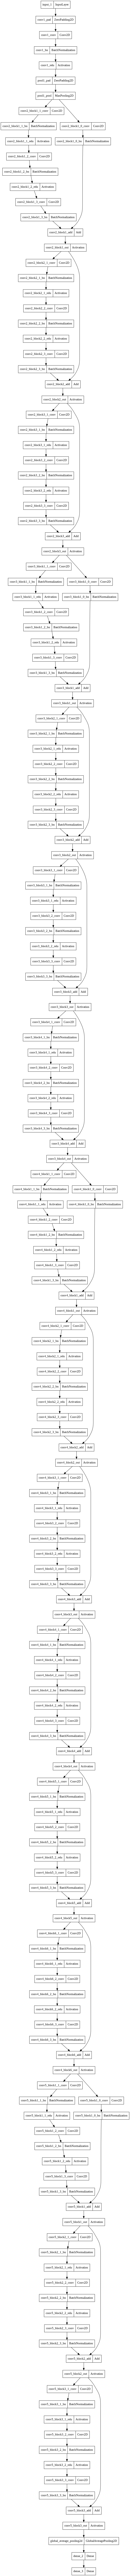

In [29]:
tf.keras.utils.plot_model(
    model_2,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
)

In [30]:
model_3.build((None, 256, 256, 3))

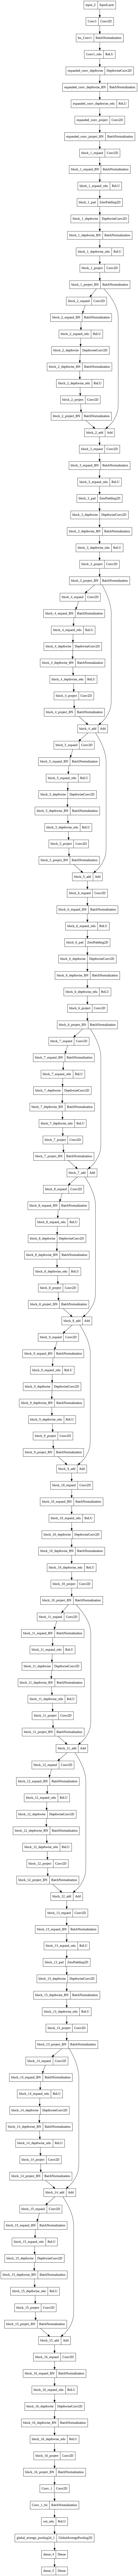

In [31]:
tf.keras.utils.plot_model(
    model_3,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
)